<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DATA/VN Cash_11

/content/drive/MyDrive/Colab Notebooks/DATA/VN Cash_11


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/DATA/VN Cash_11',target_size=(150,150), batch_size=32, class_mode='categorical')
training_set.class_indices

Found 2673 images belonging to 11 classes.


{'000200': 0,
 '000500': 1,
 '001000': 2,
 '002000': 3,
 '005000': 4,
 '010000': 5,
 '020000': 6,
 '050000': 7,
 '100000': 8,
 '200000': 9,
 '500000': 10}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [ ]:
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
84/84 [==============================] - 20s 242ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 2/50
84/84 [==============================] - 20s 233ms/step - loss: 0.0468 - accuracy: 0.9843
Epoch 3/50
84/84 [==============================] - 23s 280ms/step - loss: 0.0488 - accuracy: 0.9862
Epoch 4/50
84/84 [==============================] - 19s 231ms/step - loss: 0.0095 - accuracy: 0.9963
Epoch 5/50
84/84 [==============================] - 21s 246ms/step - loss: 0.0152 - accuracy: 0.9944
Epoch 6/50
84/84 [==============================] - 21s 247ms/step - loss: 0.0723 - accuracy: 0.9772
Epoch 7/50
84/84 [==============================] - 21s 244ms/step - loss: 0.0279 - accuracy: 0.9921
Epoch 8/50
84/84 [==============================] - 21s 251ms/step - loss: 0.0189 - accuracy: 0.9948
Epoch 9/50
84/84 [==============================] - 20s 242ms/step - loss: 0.0309 - accuracy: 0.9914
Epoch 10/50
84/84 [==============================] - 20s 234ms/step - loss: 0.0421 - accura

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DATA/Money.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.017981713637709618
Train Accuracy 0.9928919076919556


In [ ]:
model_1=load_model('/content/drive/MyDrive/Colab Notebooks/DATA/Money.h5')

1/1 [==============================] - 7s 7s/step
500000


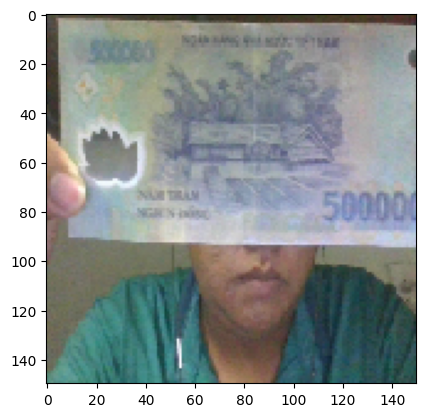

1/1 [==============================] - 0s 22ms/step
100000


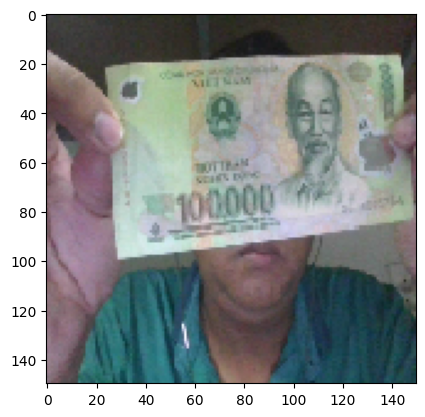

1/1 [==============================] - 0s 19ms/step
200000


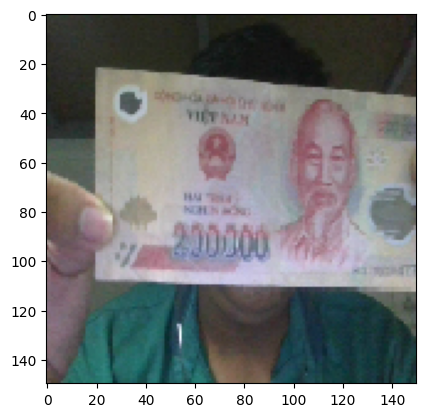

1/1 [==============================] - 0s 21ms/step
050000


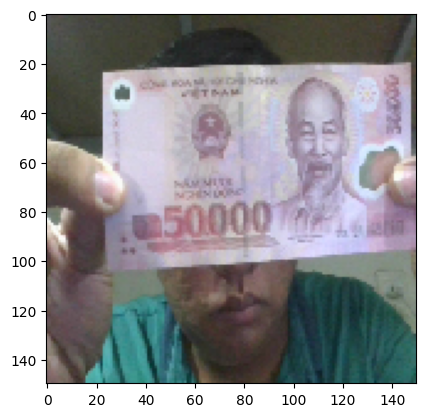

1/1 [==============================] - 0s 21ms/step
020000


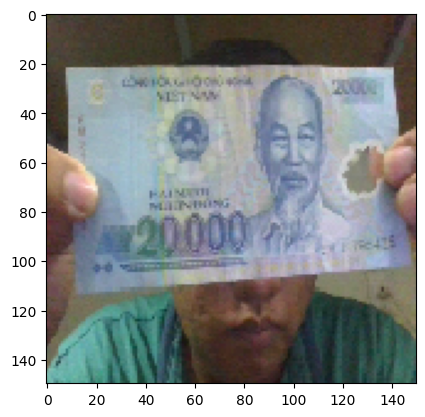

1/1 [==============================] - 0s 19ms/step
010000


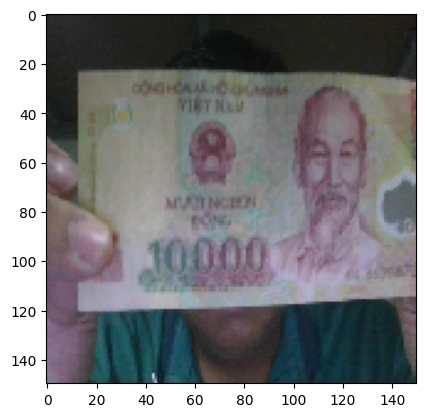

1/1 [==============================] - 0s 22ms/step
005000


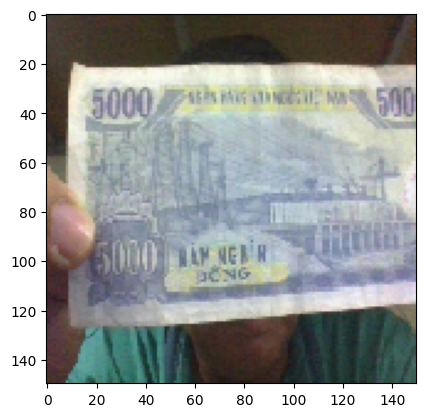

1/1 [==============================] - 0s 26ms/step
002000


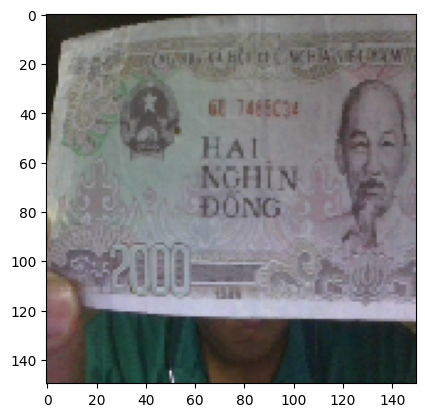

1/1 [==============================] - 0s 20ms/step
000200


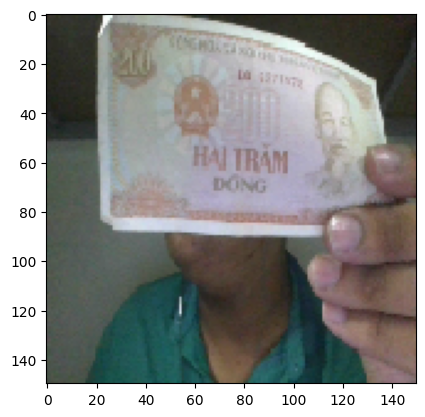

1/1 [==============================] - 0s 19ms/step
000500


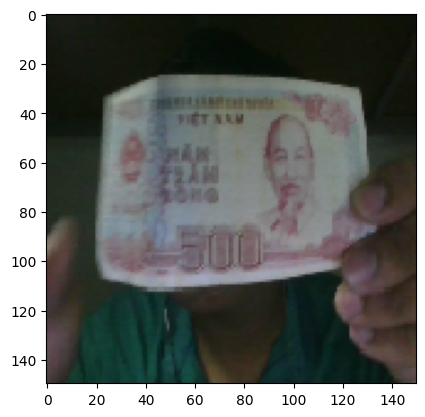

1/1 [==============================] - 0s 19ms/step
001000


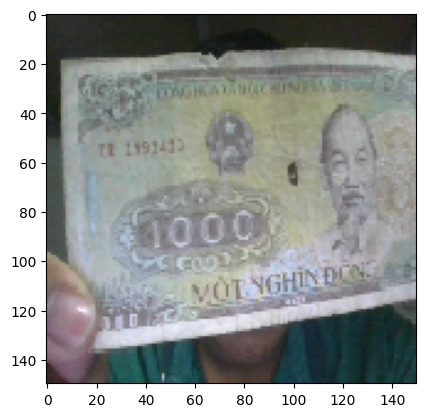

In [ ]:

test="/content/drive/MyDrive/Colab Notebooks/DATA/VN Cash_11/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['000200','000500','001000','002000','005000','010000','020000','050000','100000','200000','500000']
  print(class_name[result])
  plt.show()
